In [10]:
import pandas as pd
import numpy as np
import xlrd

sep_line = "=" * 60

# Aquire Data 

In [9]:
# imported xlrd to read this exel sheet
# used pandas to pull data from directory
super_store = pd.read_excel("sample_-_superstore.xls")

# Looking at the first 3 rows
super_store.head(3).T

,0,1,2
Row ID,1,2,3
Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688
Order Date,2016-11-08 00:00:00,2016-11-08 00:00:00,2016-06-12 00:00:00
Ship Date,2016-11-11 00:00:00,2016-11-11 00:00:00,2016-06-16 00:00:00
Ship Mode,Second Class,Second Class,Second Class
Customer ID,CG-12520,CG-12520,DV-13045
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff
Segment,Consumer,Consumer,Corporate
Country,United States,United States,United States
City,Henderson,Henderson,Los Angeles


# Prepare Data

In [4]:
# looking at the Dtypes
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [14]:
# get the total number of null values by column
null_count = super_store.isnull().sum()

# get the total number of rows in super_store
total_rows = super_store.shape[0]

# calculate the percentage of null values by column
percentage_null = (null_count / total_rows) * 100

print(f"Total number of Null values: \n{null_count}")
print(sep_line)
print(f"Percentage of null values: \n{percentage_null}%")

Total number of Null values: 
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Percentage of null values: 
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
dtype: float64%


In [15]:
# make all column names lowercase
super_store.columns = super_store.columns.str.lower()

# Verify
super_store.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [24]:
# clean column names to meet industry standards
# create a lisy of all columns that need to be changed first
cols_to_rename = [
    "row id",
    "order id",
    "order date",
    "ship date",
    "ship mode",
    "customer id",
    "customer name",
    "segment",
    "country",
    "city",
    "state",
    "postal code",
    "region",
    "product id",
    "category",
    "sub-category",
    "product name",
    "sales",
    "quantity",
    "discount",
    "profit"
]

# create new list to hold the cleaned column names
cleaned_cols = []

# create a for loop to clean all the columns
for col in cols_to_rename:
    cleaned_col = col.replace(" ", "_").replace("-", "_")
    cleaned_cols.append(cleaned_col)

print(cleaned_cols)

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [26]:
super_store.rename(columns=dict(zip(super_store.columns, cleaned_cols)), inplace=True)
super_store.head(3).T

,0,1,2
row_id,1,2,3
order_id,CA-2016-152156,CA-2016-152156,CA-2016-138688
order_date,2016-11-08 00:00:00,2016-11-08 00:00:00,2016-06-12 00:00:00
ship_date,2016-11-11 00:00:00,2016-11-11 00:00:00,2016-06-16 00:00:00
ship_mode,Second Class,Second Class,Second Class
customer_id,CG-12520,CG-12520,DV-13045
customer_name,Claire Gute,Claire Gute,Darrin Van Huff
segment,Consumer,Consumer,Corporate
country,United States,United States,United States
city,Henderson,Henderson,Los Angeles


# Take Aways:
    - there are no null values 
    - Order and Ship date are already a DateTime value 
    - column names are now lowercase and all empty space and hyphens where replaced with underscores 

## I want to forcast sales by segment using the order data. 

In [27]:
# create a new data frame from the existing one
# using order_date, segment, and sales

oss_df = super_store[['order_date', 'segment', 'sales']]
oss_df.head(3)

,order_date,segment,sales
0,2016-11-08,Consumer,261.96
1,2016-11-08,Consumer,731.94
2,2016-06-12,Corporate,14.62


In [28]:
oss_df.segment.value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

### reset the index 

In [29]:
oss_df = oss_df.set_index("order_date").sort_index()
oss_df.head(15)

,segment,sales
order_date,,
2014-01-03,Consumer,16.448
2014-01-04,Home Office,11.784
2014-01-04,Home Office,272.736
2014-01-04,Home Office,3.540
2014-01-05,Consumer,19.536
2014-01-06,Home Office,5.480
2014-01-06,Home Office,2573.820
2014-01-06,Home Office,609.980
2014-01-06,Corporate,12.780


In [30]:
# let's take a look at our start and end date 

oss_df.index.min(), oss_df.index.max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [31]:
# we can look at a subset of our data

oss_df.loc["2016-01"]

,segment,sales
order_date,,
2016-01-02,Corporate,173.940
2016-01-02,Corporate,231.980
2016-01-03,Corporate,1592.850
2016-01-03,Corporate,165.600
2016-01-03,Consumer,114.460
...,...,...
2016-01-31,Home Office,125.360
2016-01-31,Home Office,1270.990
2016-01-31,Home Office,109.592


<Axes: xlabel='order_date'>

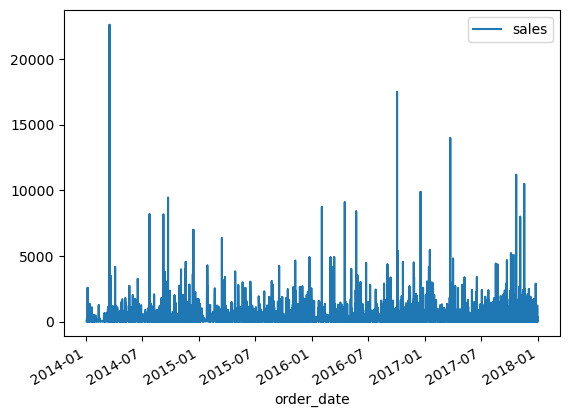

In [38]:
oss_df.plot()